In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy
import pandas as pd

In [75]:
one_word_df = pd.read_csv('word_counts.csv')

# Convert DataFrame to dictionary
one_word_dict = one_word_df.set_index('Word')['Count'].to_dict()
print(dict(list(one_word_dict.items())[:5]))

{'n': 54780, 'would': 49920, 'going': 41649, 'think': 39629, 'one': 37676}


filtering

In [76]:
remove_list = [
    'the', 'be', 'to', 'of', 'and', 'a', 'in', 'that', 'have', 'it', 'for',
    'not', 'on', 'with', 'he', 'as', 'you', 'do', 'at', 'this', 'but', 'his',
    'by', 'from', 'they', 'we', 'say', 'her', 'she', 'or', 'an', 'will', 'my',
    'one', 'all', 'would', 'there', 'their', 'what', 'so', 'up', 'out', 'if',
    'about', 'who', 'get', 'which', 'go', 'me', 'when', 'make', 'can', 'like',
    'time', 'no', 'just', 'him', 'know', 'take', 'into', 'your',
    'good', 'some', 'could', 'them', 'other', 'than', 'then', 'now',
    'only', 'come', 'its', 'over', 'think', 'also', 'back', 'after', 'use', 'two',
    'how', 'our', 'first', 'way', 'even', 'new', 'want', 'because',
    'any', 'these', 'day', 'us', 'I', 'Speaker', '-', 'is', 'And', 'So', 'I', 
    '1', 'was', 'are', '2', 'The', 'Thank', 'We', 'very', 'you',
    "I'm", 'going', "it's", "don't", 'you.', 'has', 'been', "that's",
    'But', 'were', 'This', "we're", "It's", '3',
    'those', 'had', 'see', 'that.', 'It', 'here', 'really',
    'Mr.', "I'm",  "there's", 'it.', 'three', 'If', '4', 'look',
    'You', 'did', "That's", 'through', 'part', 'should', "you're", "Commissioner",
    'well', 'yes', 'okay', 'right', 'yeah', 'um', 'uh', 'oh', 'ah', 'hmm',
    'actually', 'basically', 'literally', 'obviously', 'simply', 'just',
    'kind', 'sort', 'type', 'like', 'thing', 'stuff',
    'maybe', 'probably', 'possibly', 'perhaps',
    'anyway', 'anyhow', 'however', 'though', 'although',
    'still', 'yet', 'nevertheless', 'nonetheless',
    'therefore', 'thus', 'hence', 'consequently',
    'basically', 'essentially', 'fundamentally',
    'generally', 'usually', 'typically', 'normally',
    'always', 'never', 'ever', 'often', 'sometimes',
    'actually', 'really', 'truly', 'certainly', 'definitely',
    'absolutely', 'totally', 'completely', 'entirely',
    'pretty', 'quite', 'rather', 'somewhat',
    'anyway', 'anyhow', 'regardless', 'irrespective',
    'etc', 'etcetera', 'and so on', 'and so forth',
    'i.e', 'e.g', 'ex', 'vs', 'etc',
    'ok', 'okay', 'alright', 'sure', 'fine',
    'great', 'awesome', 'cool', 'nice', 'wonderful',
    'please', 'thank you', 'thanks', 'sorry', 'excuse me',
    'pardon', 'hello', 'hi', 'hey', 'bye', 'goodbye',
    'welcome', 'congrats', 'congratulations',
    'n', 'project', 'city', 'community', 'commissioner', 'thank',
    'commission', 'number', 'council', 'need', 'feet', 'case', 'mr',
    'department', 'years', 'much', 'something', 'point', 'today', 'name',
    'street', 'let', 'issue', 'work', 'said', 'conditions', 'questions', 'little', 'plan',
    'people', 'staff', 'site', 'applicant', 'question', 'things', 'motion',
    'mean', 'support', 'item', 'second', 'proposed', 'hearing', 'able', 'ask', 'believe',
    'specific', 'process', 'office', 'commissioners', 'issues', 'minutes', 'looking',
    'got', 'address', 'meeting', 'speak', 'existing', 'foot', '10', 'approval',
    'understand', 'change', 'wanted', 'different', 'live', 'los', 'angeles', 'hear',
    'required', 'house', 'state', 'provide', 'bit', 'place', 'heard', 'comment',
    'review', 'saying', '000', 'year', 'terms', 'far', 'decision', 'record', 'line',
    'fact', 'important', 'long', 'letter', 'comments', 'business', 'west',
    'general', 'south', 'approved', 'trying', 'request', 'allow', 'forward', 'based',
    'la', '5', 'talking', 'correct', 'find', 'concerns', 'coming', '20', 'says', 'talk',
    'speaker', 'north', 'hours', 'feel', 'problem', 'clear', 'particular', 'start',
    'center', 'order', 'add', 'end', 'help', 'morning', 'set', 'continue', 'opportunity',
    'mentioned', 'high', 'working', 'information', 'board', 'avenue', 'appellant',
    'concern', 'approve', 'wall', 'boulevard', 'sign', '30', 'level', 'changes', 'vote',
    'asking', 'appreciate', 'read', 'ahead', 'guess', 'went', 'agenda', 'future',
    'couple', 'president', 'close', 'agree', 'reason', 'section', 'big', 'came', 'away',
    'submitted', 'significant', 'needs', 'minute', 'currently', 'bring', 'making',
    'try', 'director', 'given', '8', '15', '11', 'seven', 'everybody', 'allowed'
]


for word in list(one_word_dict.keys()):
    if word in remove_list:
        del one_word_dict[word]

nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS
for word in list(one_word_dict.keys()):
    if word in stop_words:
        del one_word_dict[word]


dict(list(one_word_dict.items())[:50])

{'parking': 21371,
 'building': 21135,
 'area': 19766,
 'lot': 17383,
 'planning': 15745,
 'property': 14775,
 'public': 14741,
 'neighborhood': 14601,
 'development': 10126,
 'appeal': 9873,
 'housing': 9452,
 'condition': 8881,
 'units': 8027,
 'zoning': 7224,
 'design': 7154,
 'report': 7151,
 'zone': 7030,
 'residential': 6648,
 'space': 6481,
 'square': 6376,
 'open': 6360,
 'code': 6006,
 'land': 5913,
 'traffic': 5781,
 'permit': 5685,
 'height': 5432,
 'park': 5423,
 'safety': 5420,
 'findings': 5378,
 'ordinance': 5378,
 'additional': 5275,
 'family': 5184,
 'commercial': 5104,
 'projects': 5096,
 'school': 4902,
 'impact': 4710,
 'spaces': 4619,
 'plans': 4556,
 'district': 4422,
 'affordable': 4420,
 'construction': 4390,
 'areas': 4352,
 'floor': 4319,
 'single': 4256,
 'uses': 4112,
 'buildings': 4079,
 'map': 3933,
 'density': 3903,
 'small': 3892,
 'unit': 3890}

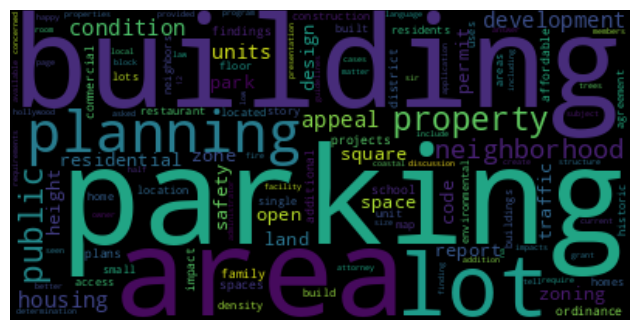

In [77]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(one_word_dict)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

more filtering to words of interest

In [78]:
words_of_interest = [
    'homelessness', 'homeless', 'unhoused', 'houseless',
    'displacement', 'displaced', 'eviction', 'evicted',
    'traffic', 'congestion', 'gridlock', 'commute',
    'parking', 'park', 'parked', 'garage',
    'affordable', 'affordability', 'low-income', 'subsidized',
    'housing', 'homes', 'apartments', 'residences',
    'zoning', 'rezoning', 'land-use', 'ordinance',
    'development', 'redevelopment', 'construction', 'building',
    'gentrification', 'gentrified', 'revitalization',
    'community', 'neighborhood', 'residents', 'locals',
    'sustainability', 'sustainable', 'green', 'eco-friendly',
    'transit', 'transportation', 'public-transport', 'metro',
    'safety', 'safe', 'security', 'protection',
    'crime', 'criminal', 'illegal', 'law-enforcement',
    'schools', 'education', 'learning', 'students',
    'environment', 'environmental', 'ecology', 'nature',
    'climate', 'climate-change', 'global-warming', 'emissions',
    'infrastructure', 'facilities', 'utilities', 'public-works',
    'budget', 'funding', 'finance', 'allocation',
    'taxes', 'tax', 'revenue', 'fiscal',
    'businesses', 'business', 'commercial', 'enterprises',
    'jobs', 'employment', 'work', 'career'
]


filtered_word_hash = {word: freq for word, freq in one_word_dict.items() if word in words_of_interest}

dict(list(filtered_word_hash.items())[:50])

{'parking': 21371,
 'building': 21135,
 'neighborhood': 14601,
 'development': 10126,
 'housing': 9452,
 'zoning': 7224,
 'traffic': 5781,
 'park': 5423,
 'safety': 5420,
 'ordinance': 5378,
 'commercial': 5104,
 'affordable': 4420,
 'construction': 4390,
 'residents': 3690,
 'environmental': 3545,
 'homes': 3378,
 'transit': 2495,
 'garage': 1770,
 'transportation': 1666,
 'jobs': 1644,
 'businesses': 1593,
 'green': 1565,
 'facilities': 1548,
 'students': 1509,
 'security': 1302,
 'environment': 1288,
 'safe': 1119,
 'nature': 1012,
 'schools': 983,
 'metro': 925,
 'funding': 762,
 'homeless': 742,
 'crime': 708,
 'illegal': 642,
 'apartments': 604,
 'infrastructure': 549,
 'parked': 471,
 'redevelopment': 441,
 'tax': 425,
 'budget': 425,
 'education': 413,
 'protection': 404,
 'displacement': 349,
 'residences': 332,
 'affordability': 302,
 'revenue': 292,
 'employment': 287,
 'sustainable': 271,
 'congestion': 267,
 'sustainability': 231}

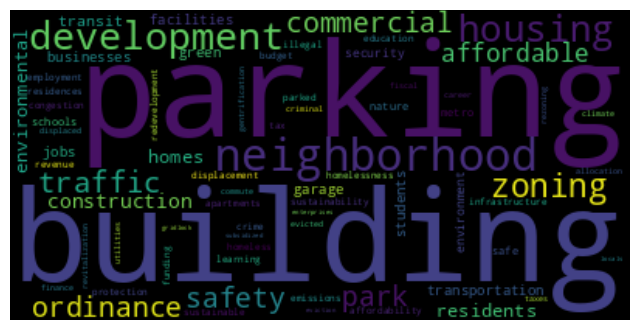

In [79]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(filtered_word_hash)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()